In [14]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import json
from pathlib import Path
import os

In [15]:
cwd = os.getcwd()
parent_path = Path(cwd).parent

DATA_PATH = parent_path / 'data' / 'genius-expertise'

In [16]:
def json_loader(file_path):
    with open(file_path) as f:
        lines = f.read().splitlines()
        
    df_inter = pd.DataFrame(lines)
    df_inter.columns = ['json_element']
    df_inter['json_element'].apply(json.loads)

    return pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [17]:
lyrics_df = json_loader(DATA_PATH / 'lyrics.jl')

In [18]:
display(lyrics_df.head())
display(lyrics_df.info())
display(lyrics_df.shape)

,song,lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b..."
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock..."
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37993 entries, 0 to 37992
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    37993 non-null  object
 1   lyrics  37993 non-null  object
dtypes: object(2)
memory usage: 593.8+ KB


None

(37993, 2)

In [19]:
song_info_df = json_loader(DATA_PATH / 'song_info.json')

In [20]:
display(song_info_df.head())
display(song_info_df.info())
display(song_info_df.shape)

,url_name,title,primary_artist,release_date,pyongs,contributors,has_bio,views,tags,annotations
0,Kendrick-lamar-swimming-pools-drank-lyrics,Swimming Pools (Drank),Kendrick-lamar,"July 31, 2012",894.0,403,True,5589280.0,"[Trap, Conscious Hip-Hop, Memes, West Coast, R...",NaN
1,Kendrick-lamar-money-trees-lyrics,Money Trees,Kendrick-lamar,"October 22, 2012",880.0,394,True,4592003.0,"[Conscious Hip-Hop, West Coast, Rap, Producer]",NaN
2,Kendrick-lamar-xxx-lyrics,XXX.,Kendrick-lamar,"April 14, 2017",188.0,389,True,4651514.0,"[Conscious Hip-Hop, Boom Bap, Pop, West Coast,...",NaN
3,A-ap-rocky-fuckin-problems-lyrics,Fuckin’ Problems,A-ap-rocky,"October 24, 2012",706.0,437,True,7378309.0,"[Gangsta Rap, Dirty South, Atlanta, Posse Cut,...",NaN
4,Kendrick-lamar-dna-lyrics,DNA.,Kendrick-lamar,"April 14, 2017",555.0,570,True,5113687.0,"[Politics, Producer, News, Conscious Hip-Hop, ...",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223257 entries, 0 to 223256
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url_name        223257 non-null  object 
 1   title           223257 non-null  object 
 2   primary_artist  223257 non-null  object 
 3   release_date    176884 non-null  object 
 4   pyongs          223256 non-null  float64
 5   contributors    223257 non-null  int64  
 6   has_bio         223257 non-null  bool   
 7   views           72065 non-null   float64
 8   tags            223257 non-null  object 
 9   annotations     0 non-null       float64
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 15.5+ MB


None

(223257, 10)

In [21]:
song_info_df.rename(
    {'url_name': 'song'},
    axis=1,
    inplace= True
)

In [22]:
raw_combined_df = pd.merge(
    lyrics_df, 
    song_info_df[['song', 'views']].dropna(axis=0),
    on='song',

)

In [23]:
display(raw_combined_df.head(10))
display(raw_combined_df.shape)
display(raw_combined_df.info())

,song,lyrics,views
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,5589280.0
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,4592003.0
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",4651514.0
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",7378309.0
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",5113687.0
5,Kendrick-lamar-poetic-justice-lyrics,\n\n[Produced by Scoop DeVille & Sounwave]\n\n...,4137688.0
6,Kendrick-lamar-bitch-dont-kill-my-vibe-lyrics,\n\n[Produced by Sounwave]\n\n[Chorus]\nI am a...,4455762.0
7,Kendrick-lamar-king-kunta-lyrics,\n\n[Produced by Sounwave; Additional producti...,3976102.0
8,Kendrick-lamar-element-lyrics,\n\n[Intro: Kid Capri & Kendrick Lamar]\nNew K...,2506800.0
9,Kendrick-lamar-the-blacker-the-berry-lyrics,\n\n[Produced by Boi-1da & Koz]\n\n[Intro: Ken...,2557473.0


(37905, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37905 entries, 0 to 37904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   song    37905 non-null  object 
 1   lyrics  37905 non-null  object 
 2   views   37905 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


None

## Cleaning the text data. 

Ideally we want our lyrics data to be cleaned in the following way:
- Have only lyric words.
- Lower case
- No punctuation
- Separate all words with spaces.

To clean the lyrics we need to first look at the lyric format. We then want to see how well a premade package called CleanText cleans the lyrics. 

We will make adjustments to until CleanText provides us with properly formatted lyrics.

## Example Lyrics

The following is an example of an entry from the raw lyrics column.

In [24]:
raw_combined_df['lyrics'][10000]

'\n\n[Intro]\nMove!\n\n[Verse 1]\nCan\'t stop thinking about if and when I die\nFor now I see that "if" and "when" are truly different cries\nFor "if" is purely panic and "when" is solemn sorrow\nAnd one invades today while the other spies tomorrow\nWe\'re surrounded and we\'re hounded\nThere\'s no above, or under, or around it\nFor "above" is blind belief and "under" is sword to sleeve\nAnd "around" is scientific miracle, let\'s pick "above" and see\nFor if and when we go above, the question still remains\nAre we still in love and is it possible we feel the same?\nAnd that\'s when goin\' under starts to take my wonder\nBut until that time, I\'ll try to sing this\n\n[Chorus]\nIf I keep moving, they won\'t know\nI\'ll morph to someone else\nWhat they throw at me\'s too slow\nI\'ll morph to someone else\nI\'m just a ghost\nI\'ll morph to someone else\nA defense mechanism mode\n\n[Verse 2]\nHe\'ll always try to stop me, that Nicolas Bourbaki\nHe\'s got no friends close but those who know 

We see that this dataset uses `[]` to denote tags for the different parts in a song. Additionally, they use \n to mark a new line and `\` to separate apostrophes. We also want to use a lower cased version of the lyrics. 

In [25]:
test_string = raw_combined_df['lyrics'][10000].lower()

test_string = test_string.replace('\n', ' ')
test_string

'  [intro] move!  [verse 1] can\'t stop thinking about if and when i die for now i see that "if" and "when" are truly different cries for "if" is purely panic and "when" is solemn sorrow and one invades today while the other spies tomorrow we\'re surrounded and we\'re hounded there\'s no above, or under, or around it for "above" is blind belief and "under" is sword to sleeve and "around" is scientific miracle, let\'s pick "above" and see for if and when we go above, the question still remains are we still in love and is it possible we feel the same? and that\'s when goin\' under starts to take my wonder but until that time, i\'ll try to sing this  [chorus] if i keep moving, they won\'t know i\'ll morph to someone else what they throw at me\'s too slow i\'ll morph to someone else i\'m just a ghost i\'ll morph to someone else a defense mechanism mode  [verse 2] he\'ll always try to stop me, that nicolas bourbaki he\'s got no friends close but those who know him most know he goes by nico,

Next we will also replace all `\'` with an empty string to combine all contractions. 

In [26]:
test_string = test_string.replace("\'",'')
test_string

'  [intro] move!  [verse 1] cant stop thinking about if and when i die for now i see that "if" and "when" are truly different cries for "if" is purely panic and "when" is solemn sorrow and one invades today while the other spies tomorrow were surrounded and were hounded theres no above, or under, or around it for "above" is blind belief and "under" is sword to sleeve and "around" is scientific miracle, lets pick "above" and see for if and when we go above, the question still remains are we still in love and is it possible we feel the same? and thats when goin under starts to take my wonder but until that time, ill try to sing this  [chorus] if i keep moving, they wont know ill morph to someone else what they throw at mes too slow ill morph to someone else im just a ghost ill morph to someone else a defense mechanism mode  [verse 2] hell always try to stop me, that nicolas bourbaki hes got no friends close but those who know him most know he goes by nico, he told me im a copy when id he

The final step is to remove all the tags that describe the different sections of the song.

We will accomplish this with a regex expression and re.sub().

In [27]:
test_string = re.sub(
    # (\[\w+\]) Matches any occurrence of [any word characters] or 
        # This matches all tags that are not the [Verse #] tag
    # (\[\w+ \d+\]) Matches any occurrence of [any word characters and any digit]
        # This is to match the [Verse #] tag
    '(\[\w+\])|(\[\w+ \d+\])',
    '',
    test_string
)
test_string

'   move!   cant stop thinking about if and when i die for now i see that "if" and "when" are truly different cries for "if" is purely panic and "when" is solemn sorrow and one invades today while the other spies tomorrow were surrounded and were hounded theres no above, or under, or around it for "above" is blind belief and "under" is sword to sleeve and "around" is scientific miracle, lets pick "above" and see for if and when we go above, the question still remains are we still in love and is it possible we feel the same? and thats when goin under starts to take my wonder but until that time, ill try to sing this   if i keep moving, they wont know ill morph to someone else what they throw at mes too slow ill morph to someone else im just a ghost ill morph to someone else a defense mechanism mode   hell always try to stop me, that nicolas bourbaki hes got no friends close but those who know him most know he goes by nico, he told me im a copy when id hear him mock me, thats almost stop

The final step is to remove all the punctuation we can once again use a regex and `re.sub()` to accomplish this.

In [28]:
test_string = re.sub(
    "[!><\"\',/@#$%&?*-+()|]",
    '',
    test_string
)
test_string

'   move   cant stop thinking about if and when i die for now i see that if and when are truly different cries for if is purely panic and when is solemn sorrow and one invades today while the other spies tomorrow were surrounded and were hounded theres no above or under or around it for above is blind belief and under is sword to sleeve and around is scientific miracle lets pick above and see for if and when we go above the question still remains are we still in love and is it possible we feel the same and thats when goin under starts to take my wonder but until that time ill try to sing this   if i keep moving they wont know ill morph to someone else what they throw at mes too slow ill morph to someone else im just a ghost ill morph to someone else a defense mechanism mode   hell always try to stop me that nicolas bourbaki hes got no friends close but those who know him most know he goes by nico he told me im a copy when id hear him mock me thats almost stopped me well were surrounded

We see that there is some extra white space between some of the words, which we can remove that with regex as well.

In [29]:
test_string = re.sub(
    '(^[ ]{2,})|([ ]{2})',
    '',
    test_string
)
test_string

'move cant stop thinking about if and when i die for now i see that if and when are truly different cries for if is purely panic and when is solemn sorrow and one invades today while the other spies tomorrow were surrounded and were hounded theres no above or under or around it for above is blind belief and under is sword to sleeve and around is scientific miracle lets pick above and see for if and when we go above the question still remains are we still in love and is it possible we feel the same and thats when goin under starts to take my wonder but until that time ill try to sing this if i keep moving they wont know ill morph to someone else what they throw at mes too slow ill morph to someone else im just a ghost ill morph to someone else a defense mechanism mode hell always try to stop me that nicolas bourbaki hes got no friends close but those who know him most know he goes by nico he told me im a copy when id hear him mock me thats almost stopped me well were surrounded and were

This cleaned lyric seems to be usable for now. We will now put the above steps into a function. 

In [28]:
def clean_lyrics(lyric):
    cleaned_lyric = lyric.lower().replace('\n', ' ').replace("\'",'')
    
    # Deal with tags.
    cleaned_lyric = re.sub(
        # (\[\w+\]) Matches any occurrence of [any word characters] or 
            # This matches all tags that are not the [Verse #] tag
        # (\[\w+ \d+\]) Matches any occurrence of [any word characters and any digit]
            # This is to match the [Verse #] tag
        '(\[(.*?)\])',
        '',
        cleaned_lyric
    )

    # Remove all punctuation.
    cleaned_lyric = re.sub(
        "[;:!><\"\',/@#$%&?–*+()|]",
        '',
        cleaned_lyric
    )
    
    # string.punctuation
    # Captures other punctuation that can not be replaced with the above regex.
    other_punctuation = ['-', '—','...', '”', '“', '.', '…', '’', '^', 'ι', '‘']
    for punctuation in other_punctuation:
        if punctuation == '—': 
            # This is to add spaces to large hyphens which denote breaks in the lyrics
            # not hyphenated words, so we want to separate these words.
            cleaned_lyric = cleaned_lyric.replace(punctuation, ' ')
        else:
            cleaned_lyric = cleaned_lyric.replace(punctuation, '')
  
    
    # Remove whitespaces greater than one. 
    cleaned_lyric = re.sub(
        ' {2,}', ' ',
        cleaned_lyric
    )
    return cleaned_lyric
    

    # What can I keep. 

We will now use this function to clean all the lyrics in the dataset. 

In [29]:
cleaned_lyrics = [clean_lyrics(lyric) for lyric in raw_combined_df['lyrics']]

In [30]:
raw_combined_df['cleaned_lyrics'] = cleaned_lyrics

In [31]:
clean_lyrics(raw_combined_df['lyrics'][0])

' pour up drank head shot drank sit down drank stand up drank pass out drank wake up drank faded drank faded drank now i done grew up round some people livin their life in bottles granddaddy had the golden flask backstroke every day in chicago some people like the way it feels some people wanna kill their sorrows some people wanna fit in with the popular that was my problem i was in a dark room loud tunes lookin to make a vow soon that ima get fucked up fillin up my cup i see the crowd mood changin by the minute and the record on repeat took a sip then another sip then somebody said to me nigga why you babysittin only two or three shots ima show you how to turn it up a notch first you get a swimming pool full of liquor then you dive in it pool full of liquor then you dive in it i wave a few bottles then i watch em all flock all the girls wanna play baywatch i got a swimming pool full of liquor and they dive in it pool full of liquor ima dive in it pour up drank head shot drank sit down

In [33]:
all_lyrics = ''.join(cleaned_lyrics)
# This makes the vocabulary for all lyrics.
vocabulary = list(set(all_lyrics.split(' ')))
len(vocabulary)

233317

In [34]:
vocabulary[0:10]

['',
 'jflirte',
 'patacake',
 'rowing',
 'ko2p',
 'dwight',
 'yawns',
 'sombres',
 'exbandit',
 'dépotoir']

In [35]:
from collections import Counter

word_counter = Counter(all_lyrics.split(sep=' '))
word_counter.most_common(50)

[('the', 667236),
 ('i', 648020),
 ('you', 495560),
 ('a', 400264),
 ('and', 328595),
 ('to', 316481),
 ('my', 303056),
 ('it', 265124),
 ('me', 263216),
 ('in', 236968),
 ('im', 236661),
 ('on', 212673),
 ('that', 200249),
 ('like', 170882),
 ('up', 148716),
 ('with', 139921),
 ('of', 136956),
 ('your', 132612),
 ('we', 128075),
 ('dont', 120914),
 ('got', 120126),
 ('for', 117699),
 ('all', 115057),
 ('know', 108039),
 ('yeah', 105413),
 ('is', 105248),
 ('get', 103194),
 ('this', 102221),
 ('be', 101256),
 ('they', 98427),
 ('but', 96583),
 ('no', 93168),
 ('just', 90661),
 ('so', 89044),
 ('its', 86495),
 ('nigga', 84028),
 ('aint', 81816),
 ('what', 80949),
 ('out', 77316),
 ('when', 74738),
 ('she', 74365),
 ('do', 68859),
 ('now', 66955),
 ('shit', 64471),
 ('niggas', 64470),
 ('bitch', 63849),
 ('fuck', 63273),
 ('if', 62326),
 ('go', 58491),
 ('was', 57223)]

In [23]:
# This is used to check for any words with unique punctuation that was not captured. 
unique_words = []
for word in word_counter:
    if word_counter[word] == 1:
        unique_words.append(word)

In [27]:
unique_words

['overinfluenced',
 'readalong',
 'putthekidstobed',
 'absentness',
 'monkeymouth',
 'goatmouth',
 'mammyfucker',
 'maneyass',
 'katzkins',
 'xhosa',
 'house\u2060',
 'ginnies',
 'doheny',
 'welldevoted',
 'tinklin',
 'momona',
 'howhhow',
 'threefourteen',
 'earthiest',
 'rockpaperscissors',
 'baca',
 'astonishments',
 'pooooppin',
 'ooooptions',
 'drughead',
 'nelsonlike',
 'robbens',
 'analysing',
 'situa',
 'muhfu',
 '30year',
 'shuns',
 'institutionalizes',
 'federalesll',
 'doodoodoodoot',
 'doodoodoodoodoot',
 'plasmascreen',
 'whitecollar',
 'metaphysically',
 'infomercials',
 'birdshufflin',
 'mistakable',
 'deplore',
 'valevictorian',
 'kendrix',
 'letdownsll',
 'strongll',
 'demetriuss',
 'miked',
 'burpee',
 'wanyá',
 'thatssss',
 '2teez',
 'backdooring',
 'offbrandass',
 'twinnie',
 'harvestses',
 'mozey',
 'wozey',
 'pussypoppin',
 'bmfing',
 'futu',
 'negotions',
 'wwwwhat',
 'twentyplus',
 'zhivago',
 'inscribe',
 'megapixels',
 'deedeedee',
 'dayah',
 'quarterpiece',
 

In [25]:
raw_combined_df

,song,lyrics,views,cleaned_lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,5589280.0,pour up drank head shot drank sit down dr...
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,4592003.0,uh me and my niggas tryna get it ya bish ...
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",4651514.0,america god bless you if its good to you am...
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",7378309.0,i love bad bitches thats my fuckin problem ...
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",5113687.0,i got i got i got i got loyalty got royalt...
...,...,...,...,...
37900,Pnl-tchiki-tchiki-lyrics,"\n\n[Intro : N.O.S.]\nOuais, ouais, ouais, oua...",395097.0,ouais ouais ouais ouais ouais jsens lodeu...
37901,Pnl-chang-lyrics,"\n\n[Couplet 1 : Ademo]\nChang, chang, chang, ...",281866.0,chang chang chang jmarche sur la muraille a...
37902,Pnl-simba-lyrics,"\n\n[Intro: N.O.S]\nOuais, Ah on va voir\nOuai...",264939.0,ouais ah on va voir ouais ouais et ça rcomm...
37903,Pnl-je-thaine-version-orange-lyrics,\n\n[Produit par BBP]\n\n[Couplet 1 : Ademo]\n...,270890.0,que dire à part que ça pue dans la street...


# Splitting Data

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [41]:
X = raw_combined_df['cleaned_lyrics']
y = raw_combined_df['views']

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
X_train.shape

(26533,)

In [45]:
bagofwords = CountVectorizer()
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<26533x186412 sparse matrix of type '<class 'numpy.int64'>'
	with 5261481 stored elements in Compressed Sparse Row format>

In [46]:
# Space X_train_transformed takes up
(X_train_transformed.data.nbytes + X_train_transformed.indptr.nbytes + X_train_transformed.indices.nbytes)*8/1024/1024

482.5127258300781

The training data takes up 482.5 MB

Next we want to see the distribution of the most 20 commmon words.

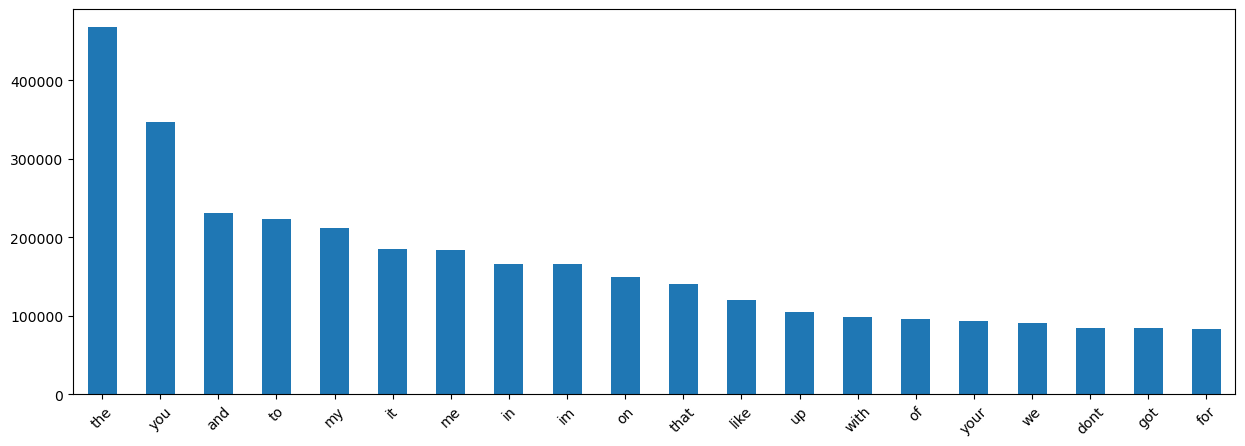

In [68]:
counts = np.array(X_train_transformed.sum(axis = 0))
words = bagofwords.get_feature_names_out()
word_count_df = pd.DataFrame(
    {
        'counts': counts[0],
    },
    index=words
).sort_values('counts', ascending=False)
word_count_df.head(20).plot(kind='bar', figsize=(15,5), legend=False)
plt.xticks(rotation=45);

In [98]:
bagofwords_stop = CountVectorizer(stop_words='english')
bagofwords_stop.fit(X_train)

X_train_transformed_stop = bagofwords_stop.transform(X_train)
X_test_transformed_stop = bagofwords_stop.transform(X_test)

print(X_train_transformed_stop.shape, X_train_transformed.shape)

(26533, 186103) (26533, 186412)


In [ ]:
# Set lower limits for word counts. 
# Set upper limits for word counts.
#  This is in the CountVectorizer. 
#  Limit vocab size. 

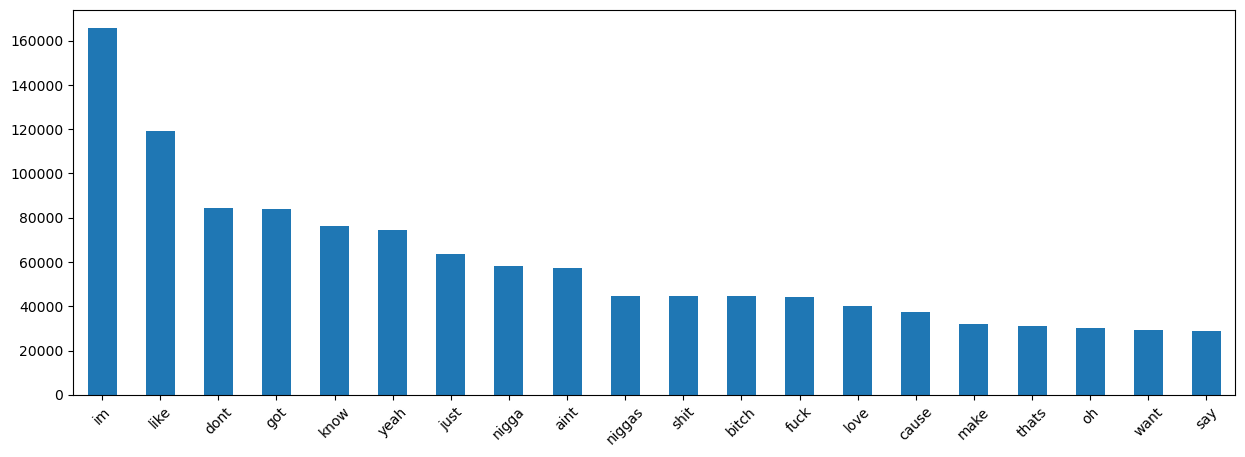

In [69]:
counts = np.array(X_train_transformed_stop.sum(axis = 0))
words = bagofwords_stop.get_feature_names_out()
word_count_df = pd.DataFrame(
    {
        'counts': counts[0],
    },
    index=words
).sort_values('counts', ascending=False)
word_count_df.head(20).plot(kind='bar', figsize=(15,5), legend=False)
plt.xticks(rotation=45);

# Making a linear regression model to predict views.

In [71]:
from sklearn.linear_model import LinearRegression

In [99]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_transformed_stop, y_train)

LinearRegression()

In [100]:
print(linear_regression.score(X_train_transformed_stop, y_train))

0.9994164381906067


In [101]:
X_test_transformed_stop[0:10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [1]:
y_test[0:10]

NameError: name 'y_test' is not defined

In [103]:
y_train[0:10]

29801      5151.0
1714     124663.0
32400     12439.0
23144     19119.0
28485     12825.0
7456      10438.0
14160    103452.0
12263     71725.0
12172     19068.0
37417     36022.0
Name: views, dtype: float64

In [104]:
print(linear_regression.score(X_test_transformed_stop, y_test))

-17.452086872204617


We can see that the $R^2$ is negative meaning that the linear regression model is not able to handle the sparse dataset, instead we will try to using another linear model with an L1 regulizer.

This regulizer should let the linear model better handle our sparse matrix dataset. 

In [88]:
from sklearn import linear_model

In [89]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_transformed_stop, y_train)

/home/jng/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13355251350194.572, tolerance: 441403401186.5639
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso(alpha=0.1)

In [90]:
clf.score(X_test_transformed_stop, y_test)

-12.078526123246078

In [26]:
# scikitlearn count vectorizer. 
#   Remove all punctuation with spaces. 
#   Remove number and digits. 
#   Add disclaimer for explicit words. 
#  Fix that for you text cleaner. 


# TODO 
    # Reduce the vocabulary size. 
    # Mindf and maxdf.
    # joblib to store data. 
        # Stores complicated python objects.
        # This only saves model.
    # parquet 
    #   Saves your data.
    #   Save output of count vectorizer.  